<a href="https://colab.research.google.com/github/ganathetechie/AlmaBetter-Capstone-Projects/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In this notebook, we are exploring two datasets related to playstore app reviews. Namely,
1.   Playstore apps dataset
2.   User reviews dataset

Our main focus in this project will be to analyse the playstore reviews dataset and extract insights that will help the developers to build those apps which the users are using and willing to use the most. 



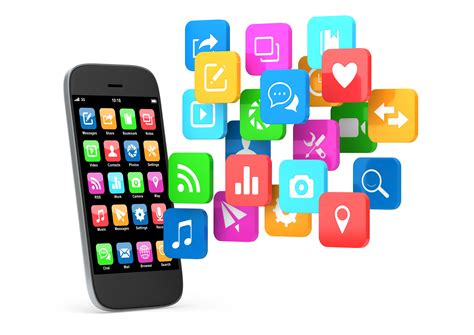 

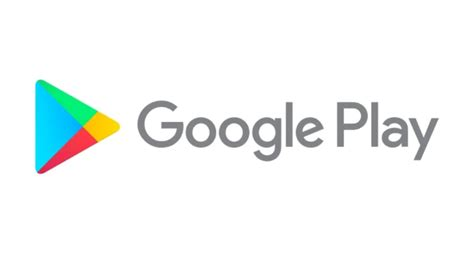



---



      










The play store reviews dataset consists of **13** columns and **10841** rows.
The columns in the dataset are,

**Column Description:**

1.  **App:** This column has the names of the applications
2.  **Category:** This column contains information about the category to which this application belongs to
3. **Rating:** It has the average rating value given by the users
4. **Reviews:** This informs about the approximate number of reviews obtained to the app.
5. **Size:** It informs about the size of the app
6. **Installs:** This defines about the number of installs that the app has achieved.
7. **Type:** It tells whether the app is available for Free or Paid
8. **Price:** It has the price value of paid apps in dollars $
9. **Content Rating:** It is a categorical value showing whom does this app meant for.
10. **Genres:** It labels the genre that the app belongs to.
11. **Last Updated:** This column has the information about the last updated date of the particular app
12. **Current Ver:** It has the current version of the app. 
13. **Android Ver:** The last column informs about the android versions above which the app is supported.



The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.

So, it is essential for the app developers to know the statistics and draw insignts from the available data in order to understand the market and develop applications which drive more business.

In this project we will perform,
* Fundamental Data Analysis followed by 
* Data Cleaning and 
* Data Manipulation  

Also, we will perform **Univariate and Bivariate** analysis on useful columns. 


Finally, we will draw some key insights from the available dataset to answer some of the following questions:


1.   Which apps has highest number of installs among paid and free?
2.   Which category has the highest users in paid and free app markets?
3.   What is the average price of the apps in each category among paid apps?
4.   What are the top 10 apps in terms of revenue?
5.   Find the most popular apps in the market, Infer some reasons for popularity.

# **Exploring the Play Store Apps Dataset**

We have two datasets for app reviews, one is the list of apps with information. And the other is a list of reviews for each app with the sentiment if that particular content of the review was positive, neutral,or negative.

Before jumping into any analysis, let us do the typical part of any data science project, i.e. Importing the required libraries and loading the dataset into the environment, We use the most commonly used libraries like **pandas, numpy**  for crunching the data and **seaborn and matplotlib** for data visualisation.

What are these libraries?
Let us know them briefly 
* **Numpy** : NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

* **Pandas**: In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. It is free software released under the three-clause BSD license.

* **Matplotlib**: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

* **Seaborn**: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [261]:
# Importing the pandas,matplotlib and seaborn libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
# Mounting the google drive to the colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Before starting make sure you have placed the dataset in the appropriate location.

**Now,Let us read the data set into the colab environment**

In [263]:
# Loading the dataset

directory_path = '/content/drive/MyDrive/AlmaBetter/Capstone Projects/Capstone-Project-1/data/Play Store Data.csv'
apps_df = pd.read_csv(directory_path)

Now that we have loaded the dataset into our colab environment, let us perform basic exploration to understand the attributes and variables in each category better.

# **Fundamental analysis of the dataset**
We need to check and see that the dataset is ready for performing several exploration operations or not, so let’s first have a look at the structure and the manner in which the data is organized.


In [264]:
#Lets see at some insights of the data using the info() method
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


The command `apps_df.info()` gives the datatype of the values present in each column and the count of Non-Null observations in them. If you observe, 


* We have 8 columns (***App, Category, Reviews, Size, Installs, Price, Genres and Last Updated***) with 10841 Non-Null values which implies that no null values are present in these columns which is a sign for a good data.

* Also, we have 4 more columns (**Type, Content Rating, Current Ver and Android Ver**) with 10833+ observations. We can look and fill this information manually from the playstore.

* But only one parameter ***Ratings*** has 9367 observations **86% Non-Null** and the remaining  **14% as Null values**.

We shall explore the ways to handle these null values in different methods.








In fundamental analysis, we perform the following methods over the data frame to observe the columns briefly.

In [265]:
# This gives the first 5 rows in the dataset.
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [266]:
# This gives the last 5 rows in the dataset.
apps_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


Let us now dive into the columns that we have in the dataset

In [267]:
apps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

*Now, we shall see some descriptive statistics of the numerical variables in the dataset.*

In [268]:
# The describe function gives the summary statistics of the numerical columns in the dataset
apps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


**Observations from above operation:**

1. The max value of the Rating column is 19, which is not correct for values on a scale of 5. Therefore we should replace the 19 with a max of 5.
2. Although, the variables like reviews, price, installs which are technically numerical, they are present in object type which indicates that we should transform the data to a numerical format. (We will convert them in the data manipulation step)

# **Data Cleaning**

## Removing the outliers

Well! What is an outlier?
In simple terms, an outlier is an extremely high or extremely low data point relative to the nearest data point and the rest of the neighboring co-existing values in a data graph or dataset you're working with.
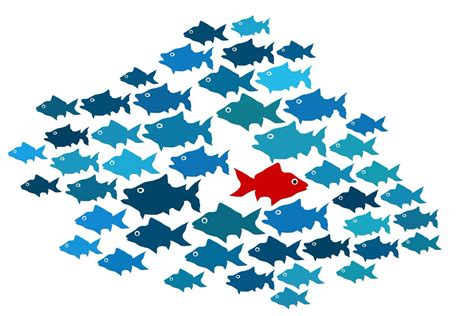

Outliers are extreme values that stand out greatly from the overall pattern of values in a dataset or graph. [Know more](https://www.freecodecamp.org/news/what-is-an-outlier-definition-and-how-to-find-outliers-in-statistics/)


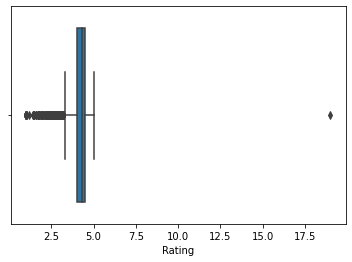

In [269]:
# Using the seaborn library to plot the rating measure
ax = sns.boxplot(x = 'Rating', data = apps_df)

We can clearly see that the rating value 19 is an **outlier** in the dataset. 
So, we will replace it with the max value that is possible i.e 5.

In [270]:
# We have replaced the outlier with a local maximum value
apps_df['Rating'] =  apps_df['Rating'].replace([19.0], 5.0) 

Let us again verify if the rating outlier is removed or not by looking at the summary statistics and boxplot again.

In [271]:
# Summary statistics if the rating column after replacing the outlier with maximum value
apps_df.describe()

,Rating
count,9367.000000
mean,4.191844
std,0.515259
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


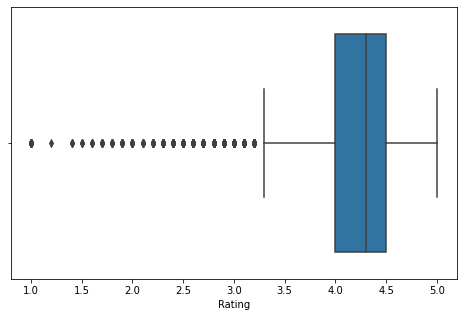

In [272]:
# Again plotting the Rating variable after replacing the outlier
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.boxplot(x = 'Rating', data = apps_df)

In [273]:
# Checking the maximum of the 
apps_df['Rating'].max()

5.0

In our Rating column, we have removed the outlier and now we have to fill the NaN values with some relevant values by using the measures of central tendency like mean, median or mode. 

## Removing the NaN values from the rating column

What is a NaN value?

**NaN** stands for **Not a Number**, it is a special floating point type which indicates the absense of a floating point integer value. One must note that NaN is not equal to 0 or Null. Refer [Difference between NaN and Null](https://medium.com/@allenhuang1996/whats-the-difference-between-null-and-nan-in-python-a1af20d523ce )


Basically, we can use either **mean imputation** or **median imputaion** to remove the Null values in the dataset.

Let us plot the histogram of the rating column and see which method suits well.

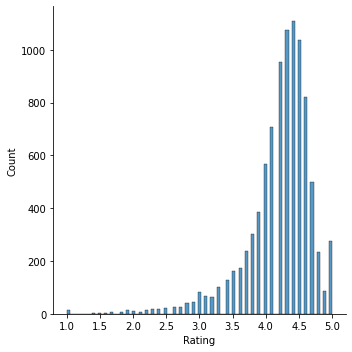

In [274]:
# Using the displot method to plot the histogram of the rating attribute
ax = sns.displot(x = 'Rating', data = apps_df)

**Observation:** We can see that from the above histogram with Null values has more apps have their ratings between  4 and 5 with  

*   mean = 4.2
*   median = 4.3



With reference of the [Imputaton Methods](https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/) as the distribution is left skewed, we are following the median imputaion method and fill the NaN with the median values in the ratings column

In [275]:
# calculating the median of the data
apps_df['Rating'].median()

4.3

In [276]:
# Filling the Null values with median of the ratings column
apps_df['Rating'] = apps_df['Rating'].fillna(apps_df['Rating'].median())

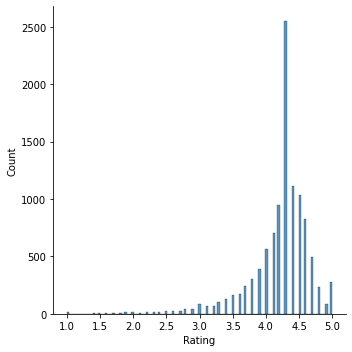

In [277]:
# Plotting the histogram of the median imputed ratings column
ax = sns.displot(apps_df.Rating)

In [278]:
# Checking the mean of the modified column
apps_df['Rating'].mean()

4.206549211327507

We can see that even after the median imputation, the mean of the column is still close to 4.2

## Removing NaN values in other columns

In this section we will remove the null values in other columns in the dataset

In [279]:
# Finding the count of null values in different columns of the dataset
apps_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

### Filling NaN with Free in the type column

In the type column we have only one app with NaN value. With manual searching in the google playstore, we found that the app is Free. So, we can remove the NaN and fill it with Free 

In [280]:
apps_df.loc[apps_df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


We can see that the price is 0 for the above app. Therefore, we can fill the type with **free** in the place of NaN

In [281]:
# Using the fillna method to fill the NaN with Free
apps_df['Type'] = apps_df['Type'].fillna('Free')

In [282]:
# Checking if there are any null values left in the column
apps_df['Type'].isna().any()

False

So, we have successfully removed the NaN value from the Type column

Now, also let us check the content rating variable for the NaN values

### Cleaning the Content Rating Column

In [283]:
# This app has misplaced values
apps_df.loc[apps_df['Content Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,5.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


The above observation has the values misplaced, let us remove the observation as it will not cause much affect in the overall analysis.

In [284]:
#Removing the row which is not collected properly
apps_df = apps_df.drop(apps_df.index[10472])

With the above action, we have dropped the misplaced observation in the dataset.

###  Removing NaNs from **Current Ver** and **Android Ver** Column







We have left with two more variables **Current Ver** and **Android Ver** to sort out and remove the NaN,

*   To fill the NaN values of the Current Ver we assume that they are still in the initial version with which they have released with i.e. 1.0.0. So, we will replace the NaNs with 1.0.0
*   There is two more observation in which the Android Ver is not present. We assume that it supports everything from android 1.0 and up


In [285]:
# Step 1: Checking the NaN values that are present in Current Ver column
apps_df.loc[apps_df['Current Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,4.3,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.3,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.3,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.3,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [286]:
# Step 2: Filling the NaN with 1.0.0 version as their current version
apps_df['Current Ver'] = apps_df['Current Ver'].fillna('1.0.0')

In [287]:
# Step 3: Checking if the null values still exist in 'Current Ver' column
apps_df.loc[apps_df['Current Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


By now, we can see that the NaN values in the Current Ver column has been successfully removed.

In [288]:
# Step 4: Checking the NaN values in the Android Ver column
apps_df.loc[apps_df['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [289]:
# Let us now replace the two NaN values in the Android Ver to 1.0 and and up 
apps_df['Android Ver'] = apps_df['Android Ver'].fillna('1.0 and up')

By this step, we have completely cleaned the data and filled the NaN with appropriate values in all the columns in the dataset. Let us verify it with a `apps_df.info()`and save the file for further use.

In [290]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


Therefore we have 10840 observations which are non-null and cleaned. 

Now, we shall save this file as `Play_Store_Data_Clean.csv`

In [291]:
apps_df.to_csv('Play_Store_Data_Clean.csv')

# **Data Manipulation**

## Transforming the data types

If you observe the dataset, the attributes like **price, installs, Current Ver and Android Ver** are numerical variables completely or partially. We shall use certain transformation methods to convert the data into usable format.


As we have saved the cleaned dataset in the new file, let us now use it to load other DataFrame from now.

In [292]:
df = pd.read_csv('/content/Play_Store_Data_Clean.csv')

Check for the columns in the cleaned dataset

In [293]:
df.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

There is a new column with name Unnamed created with the values of indexes while creating a new csv file, let us just drop the column from the dataframe

In [294]:
# Dropping the Unnamed column from the cleaned dataset
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [295]:
#Checking the datatypes of the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


The columns such as **installs** and **price** are technically numerical variables where as they are present in the dataset as objects of string. 
Let us try to perform certain string operations and extract the numbers in these columns.

In [296]:
#Creating a deep copy of the dataframe
df_copy = df.copy()

Creating a copy of the DataFrame helps us to try various modification methods without worrying about making changes to the orginal data.

In [297]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


We can see that the Rating has turned into float64 type from the object type

### Converting the price column into numerical

The pricing given is in dollars '$'. We are removing the sign from the values in the price column to crunch the data and transform it into usable numerical format.

This creates a new column with name "Price_in_$" in the dataset


In [298]:
 #Using str.replace() to remove $ from the value and store the result in a new column called Price_in_$
df_copy['Price_in_$'] = df_copy['Price'].str.replace('$','') 

In [299]:
# Check if the $ symbol is removed or not
df_copy['Price_in_$'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

We are now converting the string values to the float type by using astype method on the `Price_in_$` column

In [300]:
# Converting the price_in_$ column from string to float datatype
df_copy['Price_in_$'] = df_copy['Price_in_$'].astype(float)

In [301]:
# Checking if the dtype of the column has changed or not.
df_copy['Price_in_$'].dtype

dtype('float64')

### Converting the Installs from string object to int



 Now, we have to deal with the **installs** count column. In the dataset we have the installs count as 10+, 100+ 10,000+, 10,00,000 + and so on.. In this operation we only assume the base value as 10,100,10000 etc by removing the '+' sign and ',' from the values.





In [302]:
# Checking for the unique values in the installs column
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [303]:
#In this step we will remove the + sign from the Installs column
df_copy['Installs'] = df_copy['Installs'].str.replace('+','')

# Also, replace the ',' with a ''
df_copy['Installs'] = df_copy['Installs'].str.replace(',','')

So far, we have removed the '+' and ',' signs from the installs column but still it exists as a string value. Therefore, we should convert it to numerical values.

In [304]:
# Checking for the unique values in the installs column after performing some string manipulation techniques
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

Now that the + sign in the string object is removed, we shall convert it to a integer type

In [305]:
# Using the astype method to convert 'Installs' column into integer quantity from string
df_copy['Installs'] = df_copy['Installs'].astype(int)

The column `Installs` has been transformed into integer type 




Finally checking for the statistics of the newly modified columns

In [306]:
# Checking the descriptive statistics of the numerical columns in the dataset
df_copy.describe()

,Rating,Reviews,Installs,Price_in_$
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [307]:
# Looking into the datatypes of the columns before proceeding to further steps
df_copy.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Price_in_$        float64
dtype: object

In [308]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price_in_$
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.0


## Adding New Columns in the data frame

We are creating two new columns using the existing columns for better and deeper analysis of the data.

*   Creating a Rating Description column
*   Creating a Estimated Revenue column



In this new Rating Description column, we will split the ratings such as

1.  0-1 as Poor
2.  1-2 as Fair
3.  2-3 as Average
4.  3-4 as Good
5.  4-5 as Excellent 

In [309]:
# In this step we are assigning the meaningful categorical values to the ratings such as Poor, Good, Excellent etc depending on its rating.
# Using a for loop to iterate over the ratings column and assign values that are equivalent to their number. 

rating_description = ["Poor", "Fair", "Average", "Good", "Excellent"]
for value in range(len(rating_description)):
    df_copy.loc[(df_copy['Rating'] > value)&(df_copy['Rating'] <= value+1) , "Rating_Description"] = rating_description[value]
    

In [310]:
# Checking the unique values present in the newly created Rating_Description column.
df_copy['Rating_Description'].unique()

array(['Excellent', 'Good', 'Average', 'Fair', 'Poor'], dtype=object)

### Creating Revenue

While analysing the paid app market, it is important to check the revenue earned by these apps to draw meaningful insignts. Therefore we are creating a new column called **Estimated_base_Revenue_in_$**.

using the basic formula, i.e, 

Estimated_base_Revenue_in_$  = Installs * Price

In [311]:
# Creating a new revenue column
df_copy['Estimated_Base_Revenue_in_$'] = df_copy['Price_in_$']*df_copy['Installs']

In [312]:
# Observing the newly created columns in the df_copy dataset
df_copy.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Price_in_$', 'Rating_Description',
       'Estimated_Base_Revenue_in_$'],
      dtype='object')

In [313]:
# Observe that we have 3 newly created columns in this dataset
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price_in_$,Rating_Description,Estimated_Base_Revenue_in_$
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0,Excellent,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,Good,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.0,Excellent,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.0,Excellent,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.0,Excellent,0.0


In [314]:
# Checking the datatypes of the columns in the dataset.
df_copy.dtypes

App                             object
Category                        object
Rating                         float64
Reviews                          int64
Size                            object
Installs                         int64
Type                            object
Price                           object
Content Rating                  object
Genres                          object
Last Updated                    object
Current Ver                     object
Android Ver                     object
Price_in_$                     float64
Rating_Description              object
Estimated_Base_Revenue_in_$    float64
dtype: object

Now, we have cleaned and transformed the dataset, let us save this dataset in a new file as `Play_Store_Data_Transformed.csv`

In [315]:
df_copy.to_csv('Play_Store_Data_Transformed.csv')

### Paid Vs Free App analysis

Before jumping into the actual analysis of the data, in the given dataset the categories are broadly two when it comes to price of the app. i.e paid and free. In some scenarios we need to analyse certain variables like revenue, price only for the paid apps. Hence we are splitting the dataframe into paid and free dataframes. 

**Percentage of Paid apps vs Free apps**

In [316]:
# loading the Play_Store_Data_Transformed.csv file into a new DataFrame called df_apps 
# Dropping the 'Unnamed' column in the df_apps DataFrame

df_apps = pd.read_csv('/content/Play_Store_Data_Transformed.csv')
df_apps.drop('Unnamed: 0', axis = 1, inplace = True)

In [317]:
df_apps.dtypes

App                             object
Category                        object
Rating                         float64
Reviews                          int64
Size                            object
Installs                         int64
Type                            object
Price                           object
Content Rating                  object
Genres                          object
Last Updated                    object
Current Ver                     object
Android Ver                     object
Price_in_$                     float64
Rating_Description              object
Estimated_Base_Revenue_in_$    float64
dtype: object

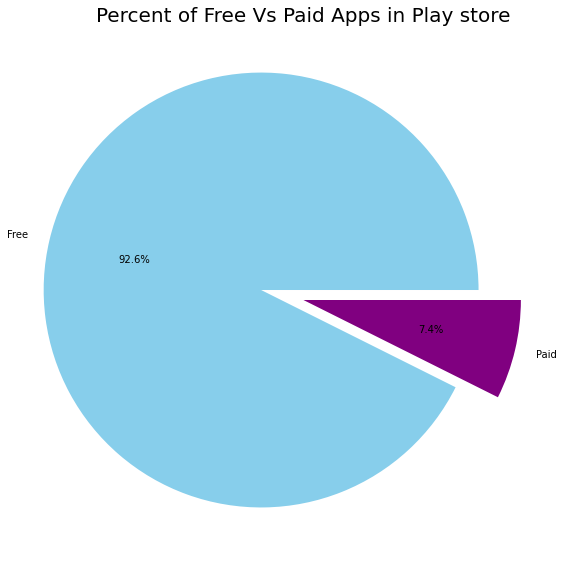

In [318]:
# Setting the figure size to 10x10
plt.figure(figsize=(10,10))
# Set the labels as Free, Paid 
labels = df_apps['Type'].value_counts(sort = True).index
# Size of the pie chart is proportional to the count of free and paid apps
sizes = df_apps['Type'].value_counts(sort = True)
# Setting the colors to Red and Green
colors = ["skyBlue","purple"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
# Set the title
plt.title('Percent of Free Vs Paid Apps in Play store',size = 20)
# show the plot
plt.show()

We observed that 92.6% apps to be free and only 7.4 % apps as paid apps.

To analyse the Paid vs Free apps deeply, we are splitting the dataset into two dataframes with paid and free apps seperated.

In [319]:
# Creating seperate paid and free dataframes
df_apps_free = df_apps[df_apps['Type'] == 'Free']
df_apps_paid = df_apps[df_apps['Type'] == 'Paid']

# **Univariate Analysis**


The term univariate analysis refers to the analysis of one variable. You can remember this because the prefix “uni” means “one.”

The purpose of univariate analysis is to understand the distribution of values for a single variable. 

In the Univariate analysis we precisely analyse how some of the variables are present in the dataset. 
We will analyse some of the key variables like ratings, Price_in_$, Estimated_base_revenue_in_dollars etc.. 

1.   Ratings and Rating Description
2.   Category
3.   Installs
4.   Price_in_$
5.   Content Rating



### Let us see how the **Ratings** , **Ratings_Description** variables are changing  

Although we have done checking the ratings column in our earlier steps, here, in this step we will try to draw some insights from the chart. 

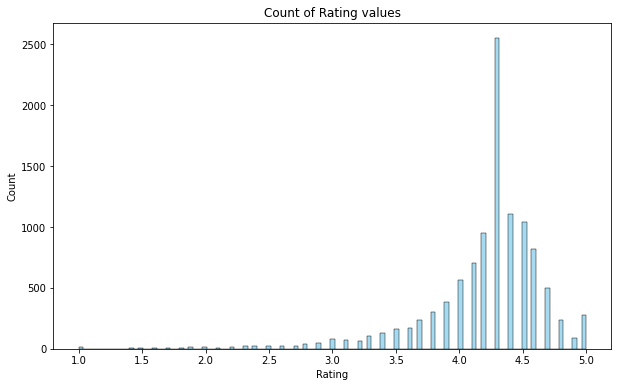

In [320]:
# Setting the chart size
fig, ax = plt.subplots(figsize = (10,6))
# Using the histogram chart to represent ratings column
ax = sns.histplot(df_apps.Rating, color = 'skyblue')
plt.title("Count of Rating values")
plt.show()

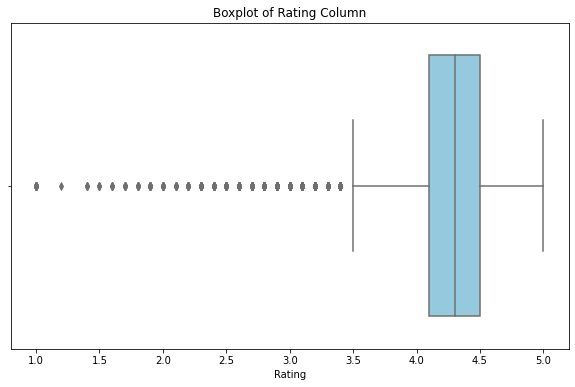

In [321]:
# Setting up the chart size
fig, ax = plt.subplots(figsize = (10,6))
# Using Boxplot with seaborn
ax = sns.boxplot(x = df_apps.Rating, color = 'skyblue')
#Setting the title
plt.title("Boxplot of Rating Column")
plt.show()

Since we have created a new column ,Rating_Description, containing overall satisfactory levels of the customers created by mapping discrete rating values to categorical values. Now, we will plot a bar graph showing the number of apps in each category.

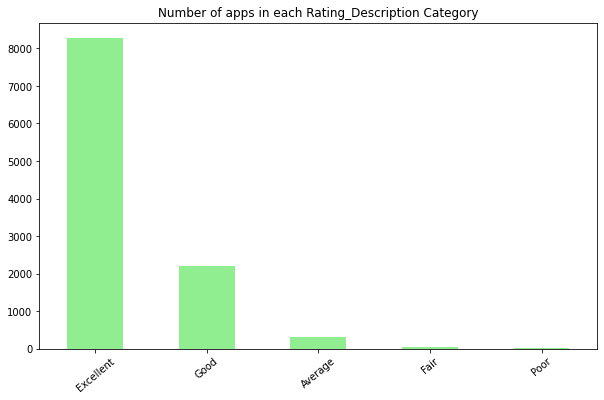

In [322]:
# Plotting a bar graph of the Rating_Description column
df_apps['Rating_Description'].value_counts().plot.bar(figsize = (10,6), rot = 40, color = 'lightGreen')
plt.title("Number of apps in each Rating_Description Category")
plt.show()

**Observations:**

*   Average Rating across all the apps is around 4.2 which is a sign that overall app market is functioning well with most of the app users hightly satisfied with the quality of service
*   From the boxplot it is evident that 50% of the app ratings lie between 4.1 and 4.5 also 75% apps has ratings above 4.1
*   The third graph depicts that more than 8000 apps got Excellent rating, followed by 2000+ good and very few average, fair and poor ratings.

With this we can assume that overall satisfaction of most of the android app users is good and Excellent with the apps they are using

### Univariate analysis on **Category** column

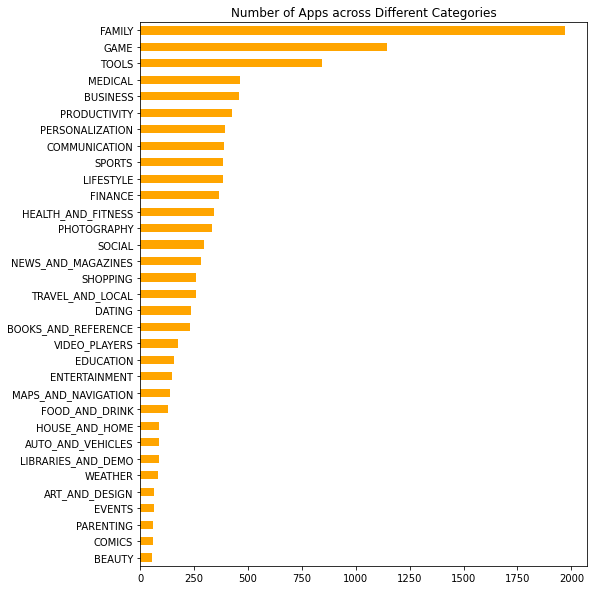

In [323]:
#Using the category column to plot a bar chart with the number of apps in each category
df_apps['Category'].value_counts().plot.barh(figsize = (8,10), color = 'orange').invert_yaxis()
plt.title("Number of Apps across Different Categories")
plt.show()

**Observations:**
*   The Category **"Family"** tops the list with nearly 2000 apps
*   **"Beauty"** category is the least prominant one with close to just 50 apps
*   Categories like **Gaming and Tools** also have significant user base. 
*   Art and Design, Events, Comics and Parenting were some of the low performing categories.

### Univariate analysis on **Installs** column

In this section, we are looking at the **Installs** column in the dataset.

Since we have trnasformed the data into a base integer removing the '+' and ',' in the value, we will now plot a bar graph to check how many apps in the dataset has certain installs 

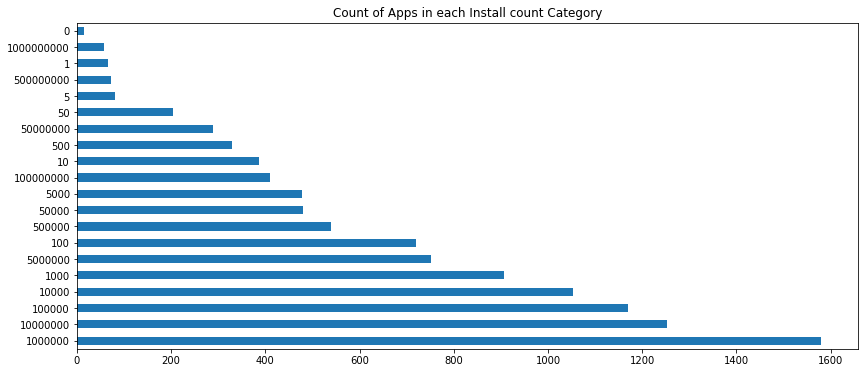

In [324]:
# Using the value_counts() method on 'Installs' column to plot a bar graph
df_apps['Installs'].value_counts().plot.barh(figsize = (14,6))
plt.title("Count of Apps in each Install count Category")
plt.show()

**Observation:**

*   There are 1580 apps with 1M+ installs in the dataset.
*   Also there are 1250 apps with 100M+ installs
*   A very few handful of apps say 50 apps has gained massive 1 Billion + downloads in the data

### Univariate analysis on **Price_in_$** column

For analysing the Price_in_$ column we will use the df_apps_paid dataframe which we have splitted earlier. The apps are priced as 0.99\$, 1.99\$ and so on..

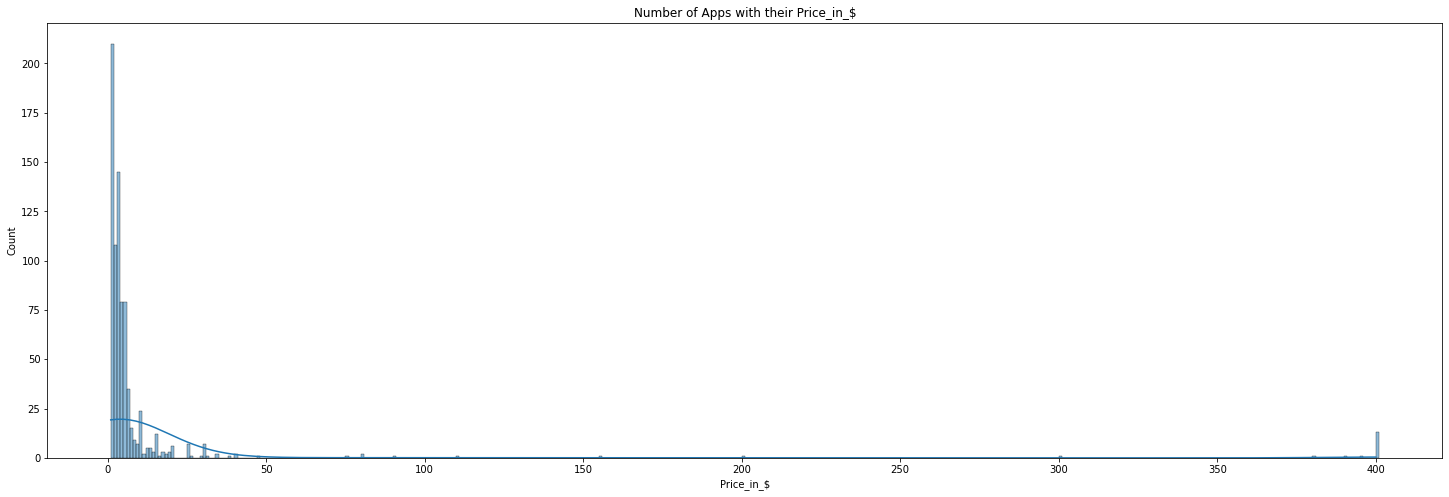

In [325]:
# Using the seaborn library to plot the histogram of the 
fig, ax = plt.subplots(figsize = (25,8))
ax = sns.histplot(data = df_apps_paid, x = 'Price_in_$',  binwidth= 1, kde =True)
plt.title("Number of Apps with their Price_in_$")
plt.show()


**Observation:**

*  Almost 90% paid apps are priced below 25$ only.
*  Most common price is 0.99\$
*  There are 10 apps which are heavily priced at 400\$ 

### Univariate analysis on **Content Rating** column

The Column content rating defines for whom or which age groups of people is the particular app meant for, There are certainly 6 Discrete categories in the column.

We will plot the bar chart and pie chart to understand the distribution of each category

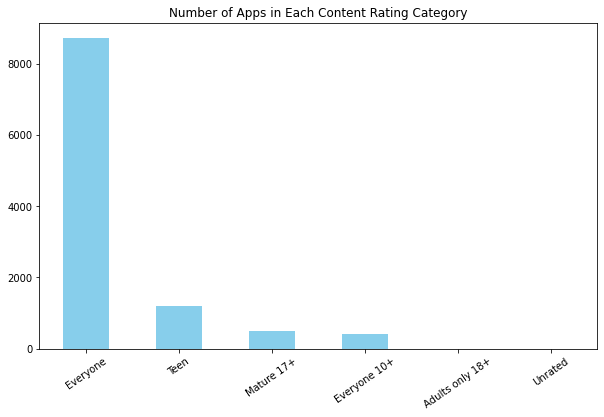

In [326]:
# Plotting bar graph on the 'Content Rating' column using the value_counts() method
df_apps['Content Rating'].value_counts().plot.bar(figsize = (10,6), rot =35, color ='skyblue')
plt.title("Number of Apps in Each Content Rating Category")
plt.show()

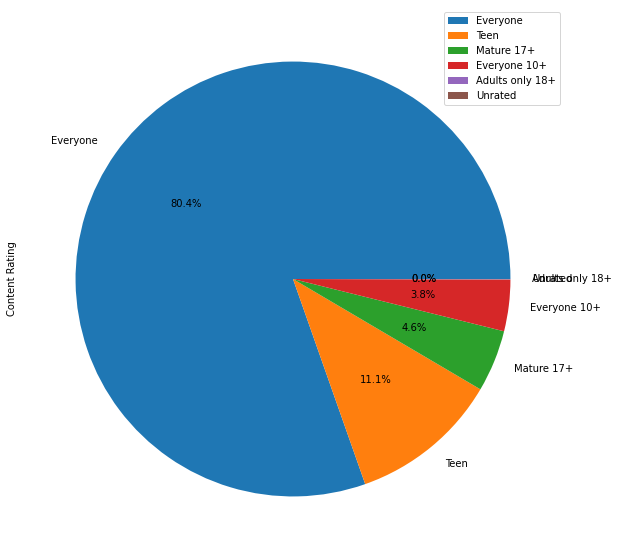

In [327]:
df_apps['Content Rating'].value_counts().plot.pie(figsize = (10,10), autopct='%1.1f%%')
plt.legend()

**Observation:**

*  80.4% i.e, 8500+ apps are rated for everyone to use irrespective of the age
*  There are 11.1% apps focussed on teens in the data,
*  The number of Adult and unrated apps is nearly 0.01% likely to be negligible in the given dataset.

# **Bivariate Analysis**

Bivariate analysis is one of the statistical analysis where two variables are observed. One variable here is dependent while the other is independent. 

In this section of the project we will,
Analyse and understand the relationship between two variables in the dataset

### Bivariate analysis on Rating vs Content Rating columns

In this bivariate analysis we will plot the boxplots between Content rating and the Rating Variables in the dataset to analyse if the user ratings vary across the different age groups.

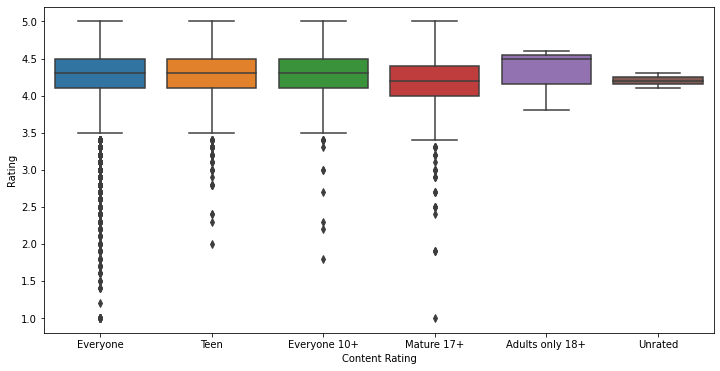

In [328]:
#Setting the fig size
fig, ax = plt.subplots(figsize = (12,6))
# using the seaborn library to plot boxplots between content rating and rating variables
ax = sns.boxplot(x = df_apps['Content Rating'], y = df_apps['Rating'])

**Observation:**

*  The average Median rating across 'Everyone' , 'Teen' and 'Everyone 10+' age group categories is equal to 4.25 which is slightly higher than the overall average.
*  The median rating value in the adult apps category is 4.5 
* It is evident that there is no significant impact on the ratings with respect to the age groups

###Rating Vs Category analysis

Here,we will dive into the analysis between different categories and their ratings present in the dataset.\

We have 33 different categories in the dataset. So, we will get 33 boxplots here.

Text(0.5, 1.0, 'Rating distribution across the Categories')

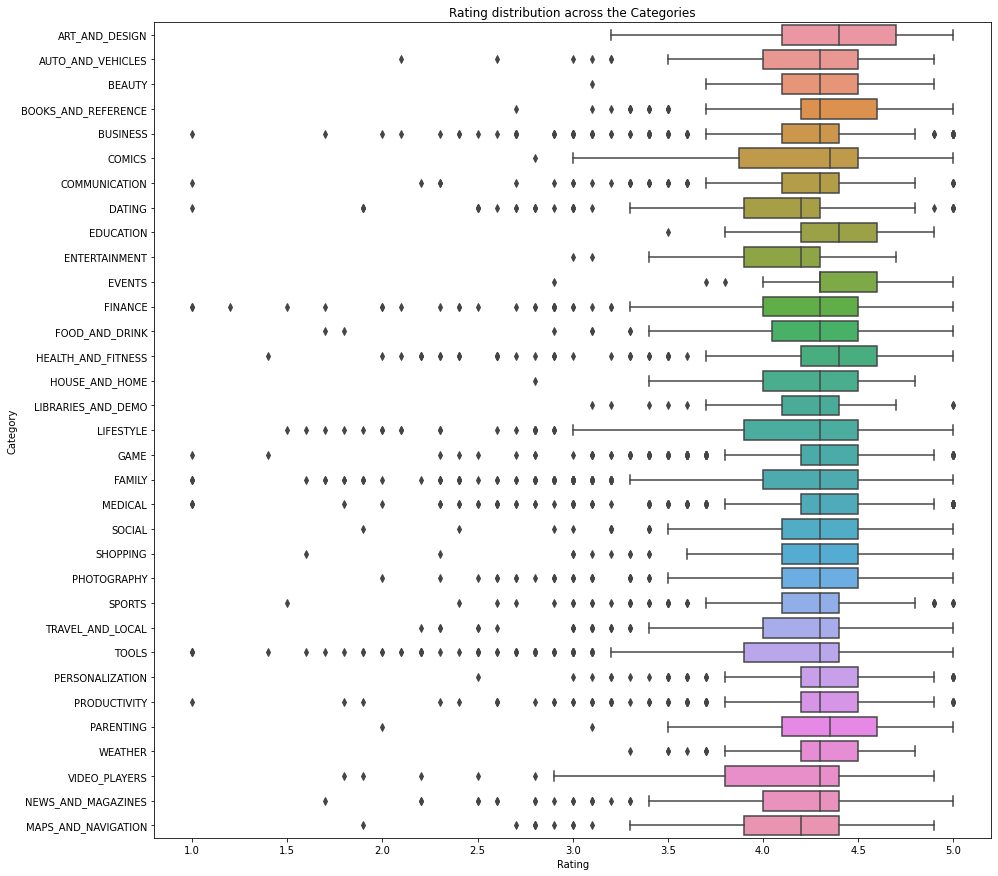

In [329]:
#Setting the figure size
fig, ax = plt.subplots(figsize = (15,15))
# plotting boxplots between Categories and Rating
ax = sns.boxplot(x = df_apps['Rating'], y = df_apps['Category'])
plt.title("Rating distribution across the Categories")

**Observation:**

* 24 out of 33 Categories have their averages at 4.2
* About 50% apps in Comics Category have their ratings between 3 and 4.3
* There are more apps in the family category with beyond the IQR

# **Answering the Key questions**

In the final section of this analysis, we will answer some key questions through the data which helps the developers understand the market better and also will try to make decisions accordingly.

### 1. Which apps has the highest installs among paid and free?

Let us see which apps have witnessed highest number of Installs in the overall Playstore apps dataset.

1. Initially, we will see a table and chart of top apps in the free app market 
2. Next, we shall see most installed paid apps in the dataset  

**Top 20 Free App analysis:**

In [330]:
# Groupling the apps based on the app name on Installs count in the free apps category
top_free_apps_by_count = df_apps_free.groupby(['App','Category'])[['App','Installs']].sum().nlargest(20,['Installs'])
top_free_apps_by_count

,,Installs
App,Category,
Subway Surfers,GAME,6000000000
Google Drive,PRODUCTIVITY,4000000000
Google News,NEWS_AND_MAGAZINES,4000000000
Google Photos,PHOTOGRAPHY,4000000000
Hangouts,COMMUNICATION,4000000000
Instagram,SOCIAL,4000000000
Candy Crush Saga,GAME,3000000000
Gmail,COMMUNICATION,3000000000
Google Chrome: Fast & Secure,COMMUNICATION,3000000000


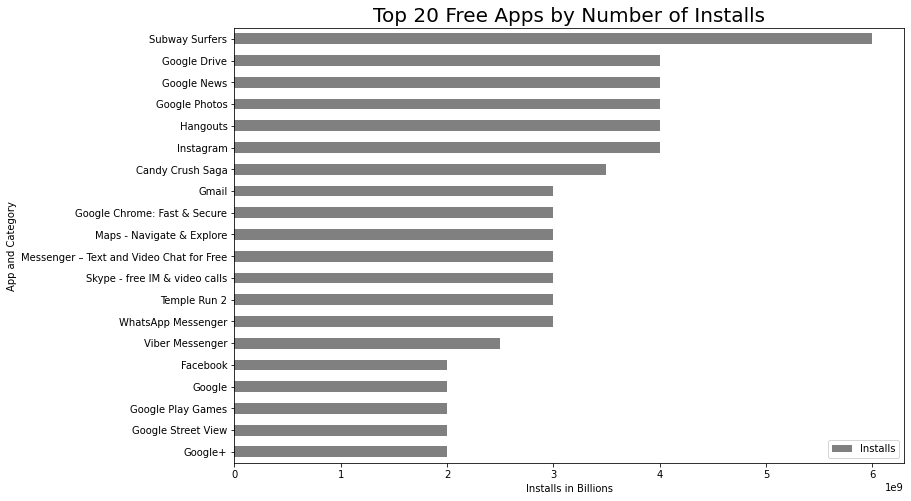

In [331]:
# Groupling the apps based on the app name on Installs count in the free apps category
top_free_apps_by_count = df_apps_free.groupby(['App'])[['App','Installs']].sum().nlargest(20,['Installs'])
# Setting the horizontal bar chart
top_free_apps_by_count.plot.barh(figsize = (12,8), color = 'grey').invert_yaxis()
#Setting the title
plt.title("Top 20 Free Apps by Number of Installs", fontsize = 20)
#setting the X and Y labels
plt.xlabel("Installs in Billions")
plt.ylabel("App and Category")
plt.show()

**Observation:**

* Games like **Subway Surfers, Candy Crush Saga, Temple run 2** are widely played and enjoyed games with 6 billion+, 3 billion+ and 3 billion+ installs respectively.  

*  Google apps like **Maps, Chrome, Gmail, Photos, Hangouts** etc..have very strong userbase due to their default apps in the android phone ecosystem. The chart shows that 10 out of top 20 free apps belongs to Google. This reveals why google has been the tech giant.

* Next comes another ecosystem of social media platforms which hooked billions of users to use their apps in day to day activities. These are **FaceBook, Instagram, Whatsapp and Messenger**.


**Top 20 Paid App Analysis:**

In [332]:
top_paid_apps_by_count = df_apps_paid.groupby(['App','Category'])[['App','Installs']].sum().nlargest(20,['Installs'])
top_paid_apps_by_count

,,Installs
App,Category,
Minecraft,FAMILY,20000000
Hitman Sniper,GAME,10000000
Facetune - For Free,PHOTOGRAPHY,3000000
Beautiful Widgets Pro,PERSONALIZATION,2000000
HD Widgets,PERSONALIZATION,2000000
Bloons TD 5,FAMILY,1000000
Card Wars - Adventure Time,FAMILY,1000000
Cut the Rope GOLD,FAMILY,1000000
DraStic DS Emulator,GAME,1000000


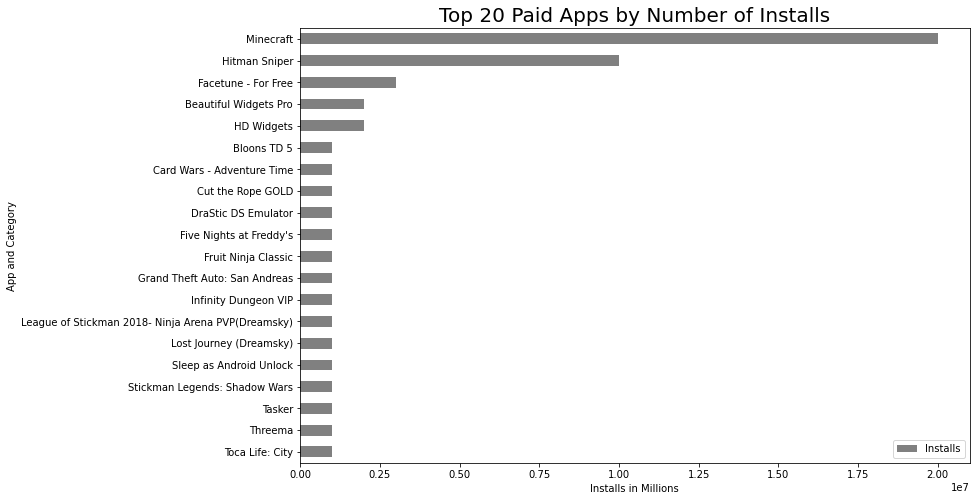

In [333]:
 # Top Paid apps by count which crossed 10M+ downloads
top_paid_apps_by_count = df_apps_paid.groupby(['App'])[['App','Installs']].sum().nlargest(20,['Installs'])
top_paid_apps_by_count.plot.barh(figsize=(12,8), color = 'grey').invert_yaxis()
#Setting the title
plt.title("Top 20 Paid Apps by Number of Installs", fontsize = 20)
#setting the X and Y labels
plt.xlabel("Installs in Millions")
plt.ylabel("App and Category")
plt.show()

**Observation:**

* Minecraft game has 2 Million + installs in the paid app market making it the most downloaded paid app, developers can use this information to develop paid apps.

* Gaming has high potential even in the paid app market as 8 out of 20 most installed paid apps belong to Game category.

### 2. Which category has the highest users in paid and free app markets?

Le us focus on which categories that has most installs in paid and free app markets. This analysis helps the developers to set their development goals and make apps in those categories that has highest user interest.

**Category with Highest users in Free app market**:

In [334]:
# Grouping the free apps dataframe based on category and sorting them by the number of summed installs 
sorted_df_free = df_apps_free.groupby(['Category']).sum()[['Installs']]
# Picking the max value in the dataframe
highest_users_in_free = sorted_df_free[sorted_df_free['Installs'] == sorted_df_free['Installs'].max()].rename(columns = {'Installs':'Highest Installed Category among Free apps'})
highest_users_in_free

,Highest Installed Category among Free apps
Category,
GAME,35064924450


**Category with Highest users in Paid app market**:

In [335]:
#Grouping the paid apps dataframe based on category and sorting them by the number of summed installs 
sorted_df_paid = df_apps_paid.groupby(['Category']).sum()[['Installs']]
# Picking the max value in the dataframe
highest_users_in_paid = sorted_df_paid[sorted_df_paid['Installs'] == sorted_df_paid['Installs'].max()].rename(columns = {'Installs':'Highest Installed Category among Paid apps'})
highest_users_in_paid

,Highest Installed Category among Paid apps
Category,
FAMILY,31271814


**Observations:**

*  Obviously as anticipated we have **Gaming** category with a whooping 35B+ installs across the category.
*  On the other hand paid apps has **Family** Category with 31M+ downloads

###  3. What is the average price of the apps in each category among paid apps?

Under paid apps, it is useful to know the average price of the prices in each category. So, we are plotting a bar graph of average price across the categories.

In [336]:
# Average Price of the apps measured in dollars by grouping across categories with mean of the overall grouped data
average_price_across_categories = df_apps_paid.groupby(['Category']).mean()[['Price_in_$']].rename(columns = {'Price_in_$':'Average_Price_in_$'})
average_price_across_categories

,Average_Price_in_$
Category,
ART_AND_DESIGN,1.990000
AUTO_AND_VEHICLES,4.490000
BOOKS_AND_REFERENCE,4.277500
BUSINESS,13.233571
COMMUNICATION,3.079259
DATING,4.490000
EDUCATION,4.490000
ENTERTAINMENT,3.990000
EVENTS,109.990000


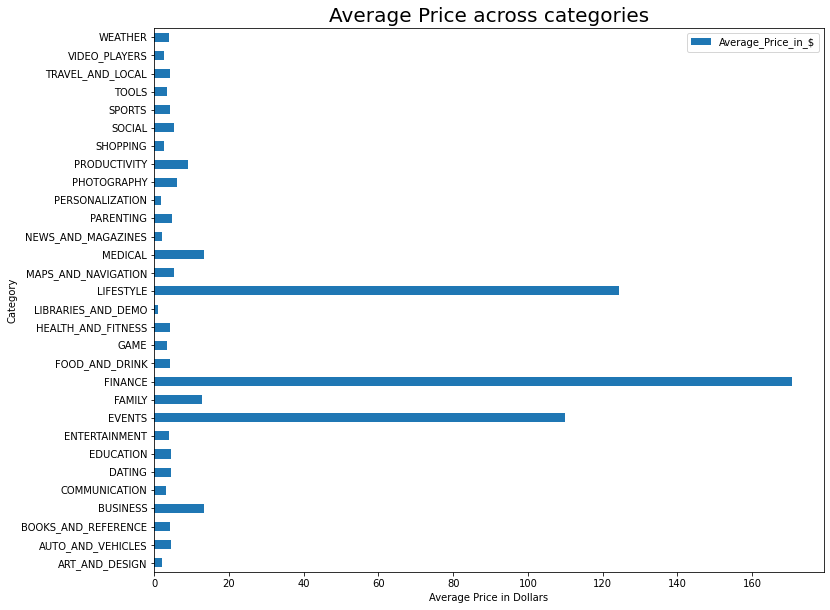

In [337]:
# Average Price of the apps measured in dollars by grouping across categories with mean of the overall grouped data
average_price_across_categories = df_apps_paid.groupby(['Category']).mean()[['Price_in_$']].rename(columns = {'Price_in_$':'Average_Price_in_$'})
#Setting up the chart type, title and size
average_price_across_categories.plot(kind = 'barh', figsize = (12,10))
plt.title('Average Price across categories', fontsize = 20)
# Labelling X axis
plt.xlabel("Average Price in Dollars")
plt.show()

**Observation:**

*  Finance category has the highest average price with 170\$ followed by lifestyle and Events at 124\$ and 109\$ respectively. Due to few apps that are highly priced in these categories, the average price shot up.
*  Every other category has their average price between 2-5 dollars only.



### 4 .What are the top 10 apps in terms of revenue?

In this question we will look into the revenue earned by the paid apps and which are the top 10 apps in terms of revenue

In [338]:

# Paid apps are grouped across the App, price and revenue columns and summing the overall revenue earned by each app.
top_10_revenue_apps = df_apps_paid.groupby(['App'])[['Estimated_Base_Revenue_in_$']].sum().nlargest(10,['Estimated_Base_Revenue_in_$'])
top_10_revenue_apps

,Estimated_Base_Revenue_in_$
App,
Minecraft,139800000.0
I am rich,39999000.0
I Am Rich Premium,19999500.0
Facetune - For Free,17970000.0
Hitman Sniper,9900000.0
Human Anatomy Atlas 2018: Complete 3D Human Body,7497000.0
Grand Theft Auto: San Andreas,6990000.0
Sleep as Android Unlock,5990000.0
DraStic DS Emulator,4990000.0


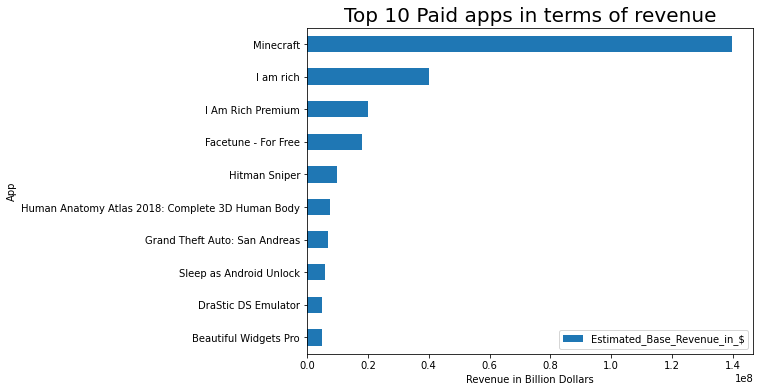

In [339]:
# Paid apps are grouped across the App, price and revenue columns and summing the overall revenue earned by each app.
top_10_revenue_apps = df_apps_paid.groupby('App')[['Estimated_Base_Revenue_in_$', 'App']].sum().nlargest(10,['Estimated_Base_Revenue_in_$'])
top_10_revenue_apps.plot.barh(figsize = (8,6)).invert_yaxis()
plt.title("Top 10 Paid apps in terms of revenue", fontsize = 20)
plt.xlabel("Revenue in Billion Dollars")
plt.show()

**Observation:**
*   As we have seen earlier, minecraft has highest downloads in the paid apps and so the revenue with 1.4 B dollars.
*   Next comes  an app  called I am rich with total revenue of 400 Million
*   We can see that gaming apps are most profitable in paid market.

### 5. Find the most popular apps in the market, Infer some reasons for popularity.

Popularity can be identified and understood by various factors like installs, ratings and reviews etc..

But, to answer the question of popularity we have picked the reviews column because it can't be done without the concent of the users. In the case of google apps the user gets them by default, so the installs is not the right option to choose.

While writing reviews on the other hand can be done only when the user takes time and writes some opinion on the app. So, let us see top 10 popular apps in the market. 

In [340]:
popular_df = df_apps.groupby('App')[['Reviews','App']].sum().nlargest(10,['Reviews'])
popular_df

,Reviews
App,
Instagram,266241989
WhatsApp Messenger,207348304
Clash of Clans,179558781
Messenger – Text and Video Chat for Free,169932272
Subway Surfers,166331958
Candy Crush Saga,156993136
Facebook,156286514
8 Ball Pool,99386198
Clash Royale,92530298


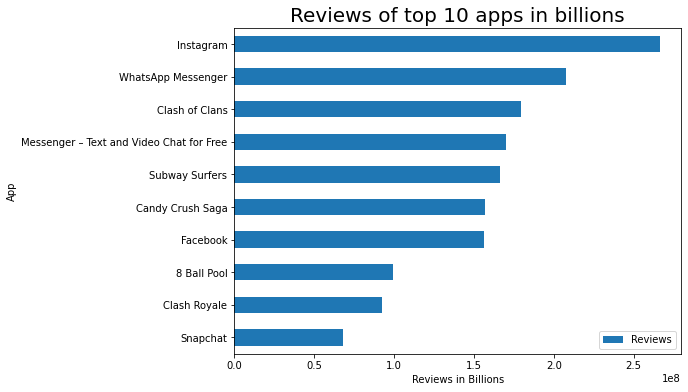

In [341]:
# Assuming the popularity based on the number of reviews users have given to the app across both the categories of paid and free
popular_df = df_apps.groupby('App')[['Reviews','App']].sum().nlargest(10,['Reviews'])
# plotting the horizontal bar chart of the top 10 apps
popular_df.nlargest(10,['Reviews']).plot.barh(figsize = (8,6)).invert_yaxis()

# setting up the x axis label and Title
plt.xlabel("Reviews in Billions")
plt.title("Reviews of top 10 apps in billions", fontsize = 20)
plt.show()

**Observations:**

*   The FaceBook ecosystem which is the social media giant containing Instagram,Facebook, Whatsapp and Messenger beats google's product in terms of user reviews.
*   Next comes few popular apps like Subway Surfers, Candy Crush, Clash of Clans, 8 Ball pool and Clash Royale.
*   Snapchat is an independent player in the top 10 popular apps at 10th position
*  FaceBook has been consistently acquiring the new products and is able to serve the needs of the users with their ad based revenue model. Since the users are getting all these services for free, the popularity steadily increased.

# **Analysing the User Reviews Dataset**

In the project, we also have another dataset called User Reviews data. This dataset has 5 columns.

1. **App:** Name of the application
2. **Translated Review:** It has the reviews given by users translated to english.
3. **Sentiment:** It conveys whether the reviews are positive or negative
4. **Sentiment Polarity:** It is the expression that determines the sentimental aspect of an opinion.
5. **Sentiment Subjectivity:** It is the score that defines the subjectivity of the text.

In this section we will perform some overall analysis on the user reviews dataset

In [342]:
#Loading the User Reviews dataset into the user_reviews dataframe
user_reviews_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Capstone-Project-1/data/User Reviews.csv')

In [343]:
# Checking the dataframe information.
user_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [344]:
# using the dropna method to drop the NaN values in the data if exists
user_reviews_apps = user_reviews_df.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)


### Distribution of Sentiment among the Apps

Now that we have dropped the NaN values present in the dataset, let us plot a pie chart showing the distribution of the reviews sentiment in this dataset. 

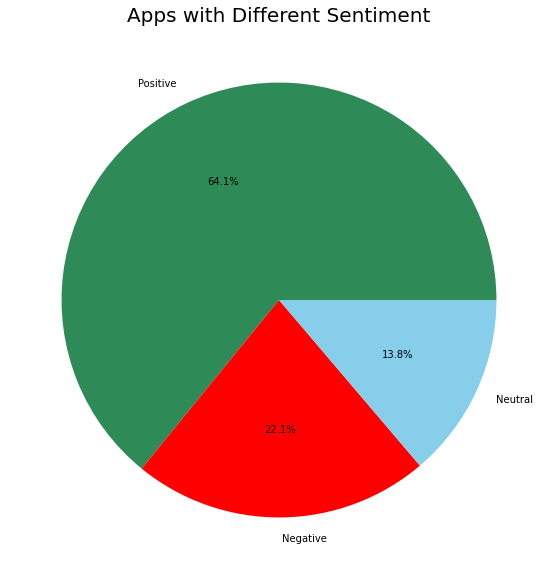

In [345]:
# Setting the figure size to 10x10
plt.figure(figsize=(10,10))
# Set the labels as Free, Paid 
labels = user_reviews_apps['Sentiment'].value_counts(sort = True).index
# Size of the pie chart is proportional to the count of free and paid apps
sizes = user_reviews_apps['Sentiment'].value_counts(sort = True)
# Setting the colors to Red and Green
colors = ["Seagreen",'red',"Skyblue"]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
# Set the title
plt.title('Apps with Different Sentiment',size = 20)
# show the plot
plt.show()

**Observation:**
*   It is goood to see that 64% apps reviews got completely positive reviews and 13.8% neutral reviews.
*   Around 22.1% apps god serious issues with them and probably the developers should look into these negative reviews.

### Word Cloud Analysis:

To simplify and dive deep into the reviews column, it is essential to see which are the terms users are largely using and a word cloud will pribably give you a glimple of all the terms repeated in the dataset.

In this analysis, we will split the dataset into 3 dataframes depending on the type of sentiment in the review as positive, negative and neutral.

Later, we will develop 3 wordclouds individually for each dataframe.

In [346]:
# In this part we are splitting the dataset into 3 parts based on the type of sentiment into positive, negative and neutral reviews.
user_reviews_positive = user_reviews_apps[user_reviews_apps['Sentiment'] == 'Positive']
user_reviews_negative = user_reviews_apps[user_reviews_apps['Sentiment'] == 'Negative']
user_reviews_neutral = user_reviews_apps[user_reviews_apps['Sentiment'] == 'Neutral']

**Word Cloud Analysis on the Positive Reviews:**

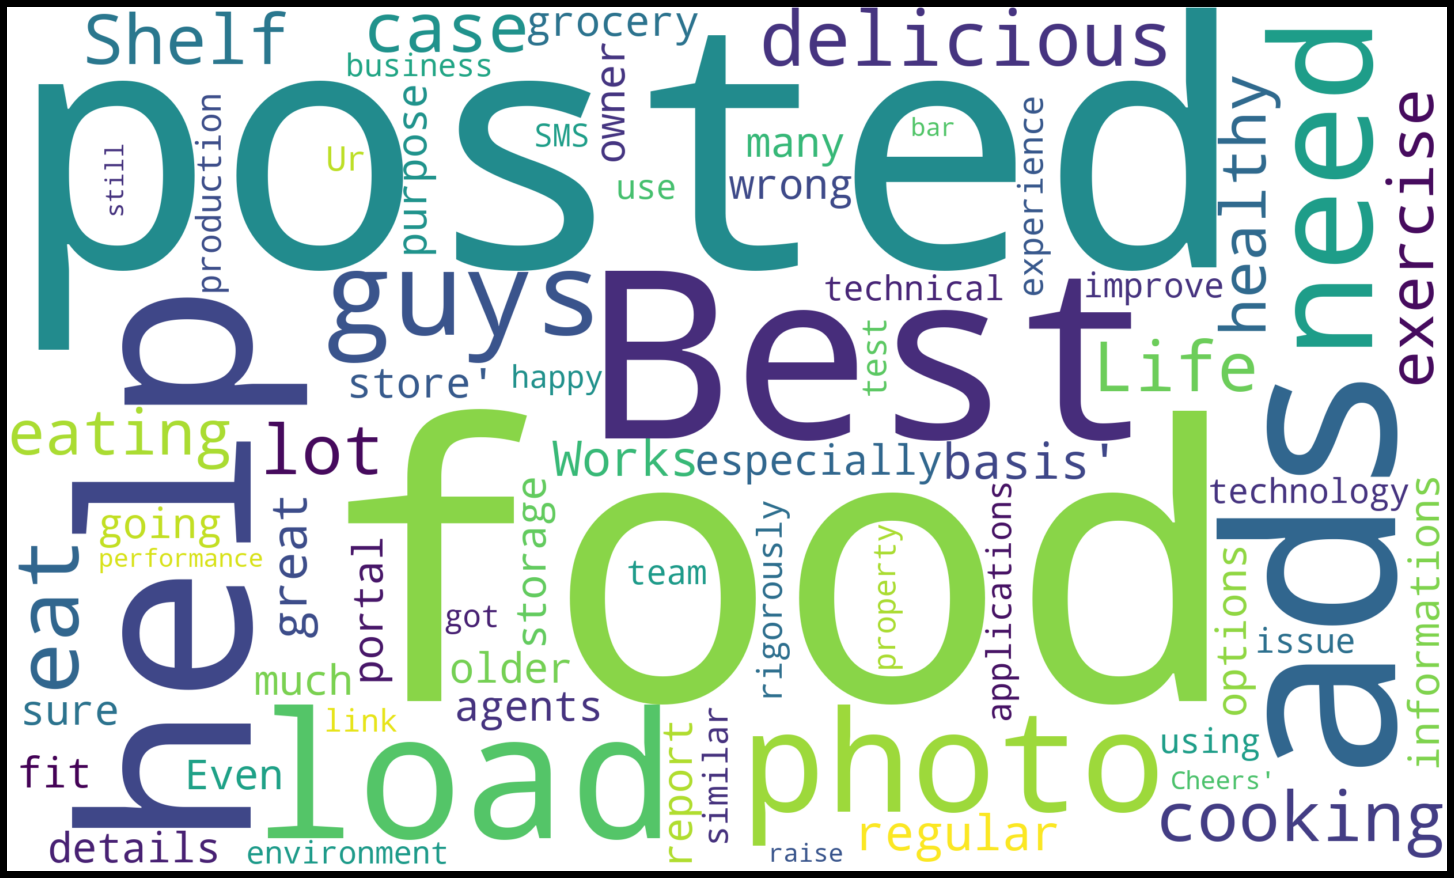

In [347]:
# Importing the required methods from wordcloud library
from wordcloud import WordCloud, STOPWORDS

# Extracting the text from the reviews column
text = user_reviews_positive.Translated_Review.values
# Choosing the width, height and color of the word cloud
wordcloud = WordCloud(
    width = 2500,
    height = 1500,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
# Setting the figure parameters
fig = plt.figure(
    figsize = (20, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


**Observation:**

* One can read through all the words in the above word cloud and understand which words are highly repeated and so can analyse the positivity in the reviews.

**Word Cloud Analysis on the Negative Reviews:**

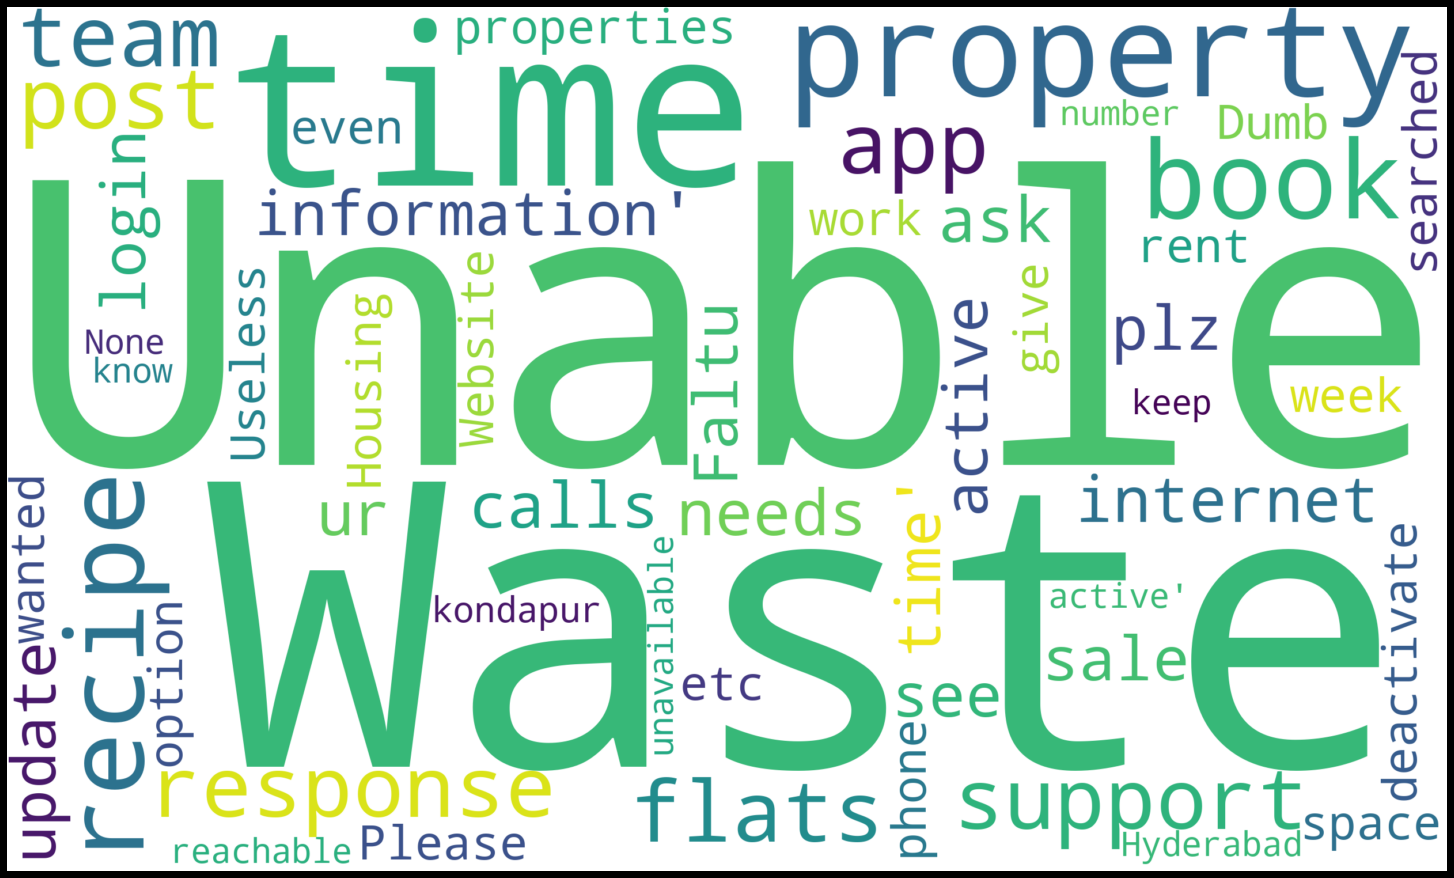

In [348]:
# Importing the required methods from wordcloud library
from wordcloud import WordCloud, STOPWORDS

# Extracting the text from the reviews column
text = user_reviews_negative.Translated_Review.values
# Choosing the width, height and color of the word cloud
wordcloud = WordCloud(
    width = 2500,
    height = 1500,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
# Setting the figure parameters
fig = plt.figure(
    figsize = (20, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Observation:**

* One can read through all the words in the above word cloud and understand which words are highly repeated and so can analyse the negativity in the reviews.

**Word Cloud Analysis on the Neutral Reviews:**

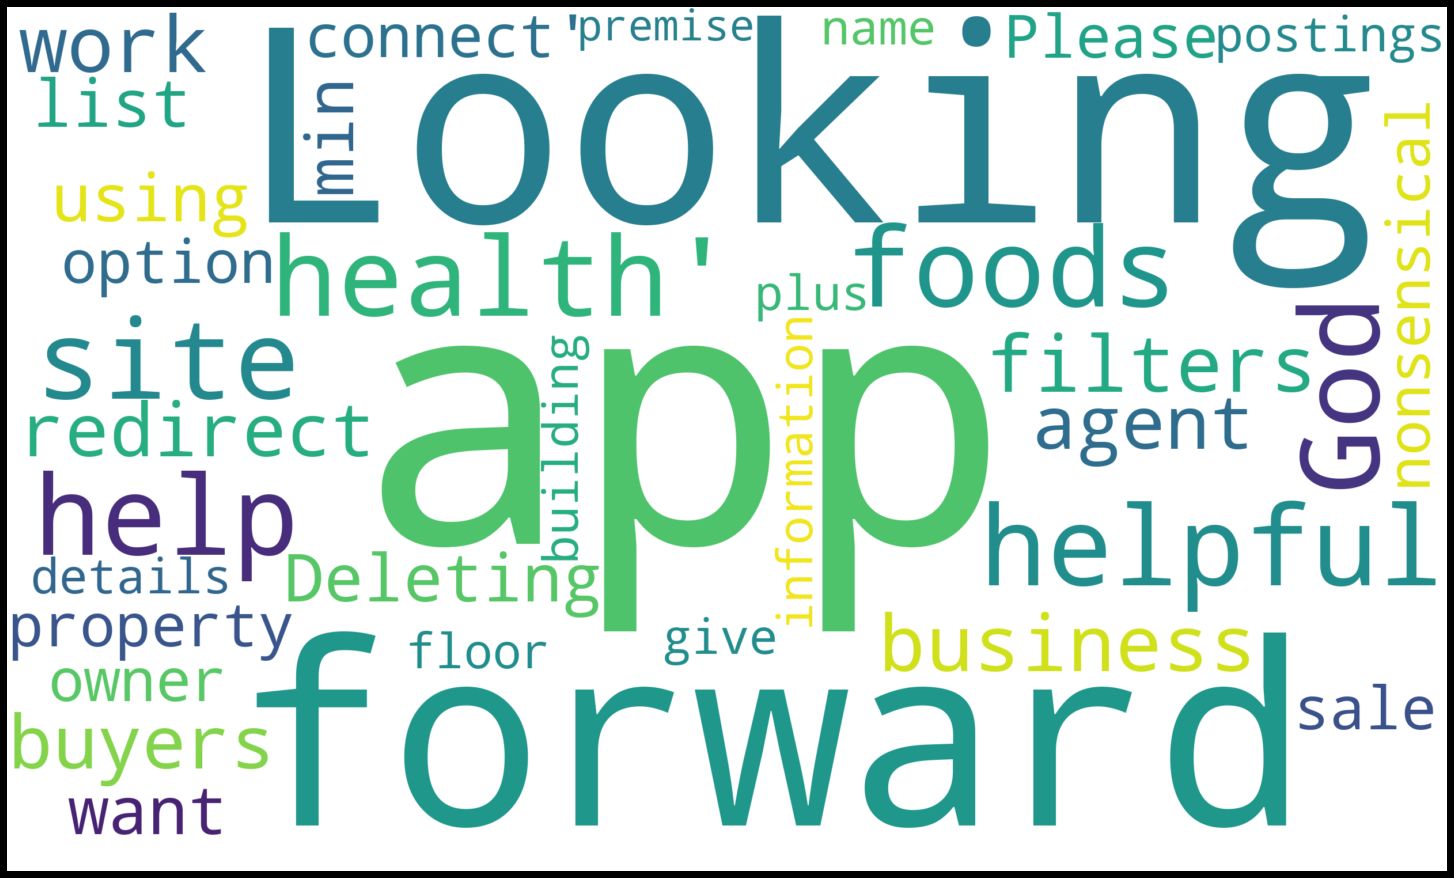

In [349]:
# Importing the required methods from wordcloud library
from wordcloud import WordCloud, STOPWORDS

# Extracting the text from the reviews column
text = user_reviews_neutral.Translated_Review.values
# Choosing the width, height and color of the word cloud
wordcloud = WordCloud(
    width = 2500,
    height = 1500,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
# Setting the figure parameters
fig = plt.figure(
    figsize = (20, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Observation:**

* One can read through all the words in the above word cloud and understand which words are highly repeated and so can analyse the sentiment in the neutral reviews.

# **Conclusion:**

The play store app market has diverse variety of apps present in it around 33 of them present in our dataset. In our analysis we identified some key insights that a developer can take advantage of. Here I am summing up our analysis in the following key insights.

1. 92.6% apps in the playstore are available for free of charge. Developers who develop free apps use google ads to generate revenue. While 7.4% apps are paid apps. So we can conclude that android app market is hugely dominated by the free apps. 
2. In the given dataset the average rating of more than 8000 apps is at the average of 4.2 with excellent rating. It is an indication that overall user satisfaction in the playstore app market is very good.
3. Also, we can see that 80% of the apps are meant for everyone irrespective of their age group. So, it is advisable to tap into this space which has large user base.
4. In the paid app market, 0.99\$ to 2.99\$ is accepted well, So anyone trying to launch a paid app can pick a price in this range.
5. Family and Gaming categories are performing well in the android market with highest installs in numbers.
6. Tech giants like Facebook and Google hold the top position when it comes to the number of installs. One must keep a note that many of the google apps are comes with the native android smartphone so there is no exaggeration that these apps have high installs. On the other hand Facebook being a social media platform disrupted the android market with Instagram, Whatsapp in its family. These popular apps though available for free but make huge money by running targetted ads.
7. Minecraft managed to get lots of users even being a paid app. Developers should learn the facts that made minecraft successful.
8. We can see from the User reviews dataset that 22% of the overall reviews are negative.

So, to conclude developers can start building games or apps that families can enjoy to witness more audience. The social media app market is quite highly dominated by giant platforms and it is relatively hard to succeed in that space.
